In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression

In [4]:
!pip3 install -U scikit-learn scipy matplotlib



  Using cached scipy-1.11.3-cp312-cp312-macosx_12_0_arm64.whl.metadata (217 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 6.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 9.1 MB/s eta 0:00:0000:0100:01m
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [38]:
df = pd.read_csv("/Users/sonubodat/Desktop/Machine Learning/datasets/dataset.csv")

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df.shape

(1460, 81)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


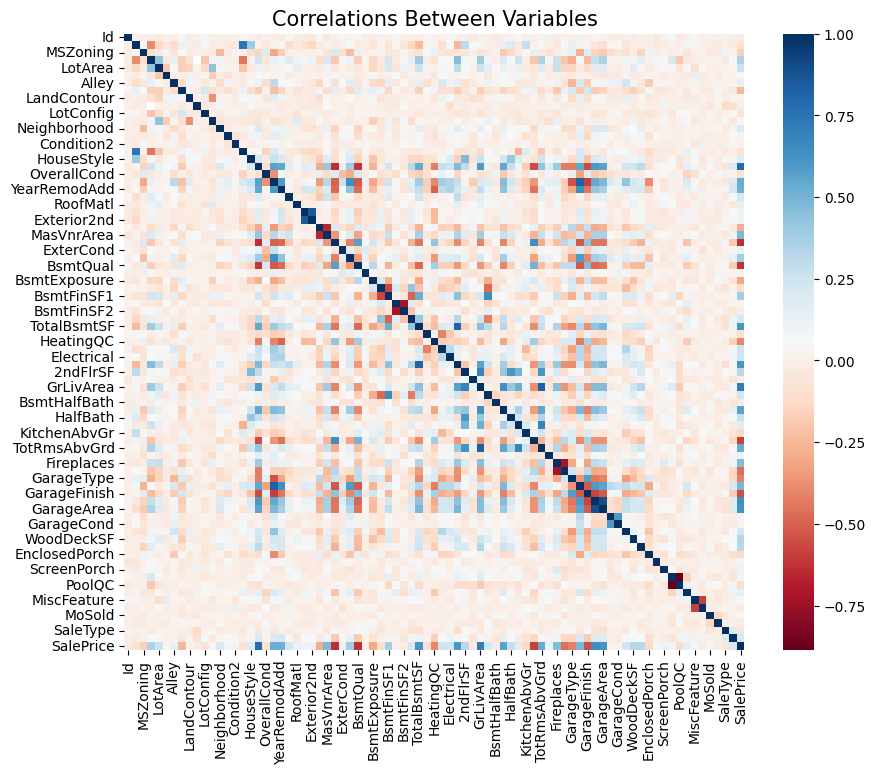

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Selection</h1>

We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.

In [45]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)

cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

important_cols = important_num_cols + cat_cols

df = df[important_cols]
df

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,...,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,2,2,856,856,1710,2,2,...,2,548,208500,3,0,0,1,2,4,0
1,6,1976,1976,3,2,1262,1262,1262,2,3,...,2,460,181500,3,0,0,1,3,4,0
2,7,2001,2002,2,2,920,920,1786,2,2,...,2,608,223500,3,0,0,1,2,4,0
3,7,1915,1970,3,3,756,961,1717,1,2,...,3,642,140000,3,0,0,1,2,0,0
4,8,2000,2000,2,2,1145,1145,2198,2,2,...,3,836,250000,3,0,0,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,3,2,953,953,1647,2,3,...,2,460,175000,3,0,0,1,3,4,0
1456,6,1978,1988,3,2,1542,2073,2073,2,3,...,2,500,210000,3,0,0,1,3,4,0
1457,7,1941,2006,0,3,1152,1188,2340,2,2,...,1,252,266500,3,0,0,1,2,4,0
1458,5,1950,1996,3,3,1078,1078,1078,1,2,...,1,240,142125,3,0,0,1,2,4,0


***Checking for the missing values***

In [46]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
ExterQual        0
BsmtQual         0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
GarageFinish     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


Splitting the data into X and y chunks

In [47]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

In [48]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

***As you can see, standardization is done successfully***

In [49]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,...,GarageFinish,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,0.651479,1.050994,0.878668,-0.777976,-0.339830,-0.459303,-0.793434,0.370333,0.789741,-0.409369,...,-0.318475,0.311725,0.351000,3,0,0,1,-0.409369,4,0
1,-0.071836,0.156734,-0.429577,0.663451,-0.339830,0.466465,0.257140,-0.482512,0.789741,0.795629,...,-0.318475,0.311725,-0.060731,3,0,0,1,0.795629,4,0
2,0.651479,0.984752,0.830215,-0.777976,-0.339830,-0.313369,-0.627826,0.515013,0.789741,-0.409369,...,-0.318475,0.311725,0.631726,3,0,0,1,-0.409369,4,0
3,0.651479,-1.863632,-0.720298,0.663451,0.772619,-0.687324,-0.521734,0.383659,-1.026041,-0.409369,...,0.801942,1.650307,0.790804,3,0,0,1,-0.409369,0,0
4,1.374795,0.951632,0.733308,-0.777976,-0.339830,0.199680,-0.045611,1.299326,0.789741,-0.409369,...,-0.318475,1.650307,1.698485,3,0,0,1,-0.409369,4,0


Splitting the data into Train and Test chunks for better evaluation

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
class LinearRegression:
    def __init__(self, initial_weights, intercept=0):
        self.weights = initial_weights.copy()
        self.intercept = intercept

    def print_weights_and_intercept(self):
        for i, weight in enumerate(self.weights):
            print(f'x{i} : {weight}')
        print(f'intercept : {self.intercept}')

    def train(self, X_train, y_train, learning_rate, max_epoch, early_stopping=0.01):
        prev_cost = -1
        epoch = 0

        while True:
            if epoch > max_epoch:
                break

            cost = self.calculate_cost(X_train, y_train)

            if cost == 0:
                print('\nCongratulations perfectly fitting weights were found\n')
                break

            if prev_cost > 0 and (prev_cost - cost < early_stopping or cost > prev_cost):
                break

            epoch += 1
            self.gradient_descent(X_train, y_train, learning_rate)
            prev_cost = cost

            print(f'Epoch: {epoch}, cost: {cost}')

        print('Training complete')

    def predict(self, X):
        m = len(X)  # number of data points
        n = len(self.weights)  # number of parameters
        predictions = [self.intercept] * m

        for i in range(m):
            for j in range(n):
                predictions[i] += self.weights[j] * X[i][j]

        return predictions

    def calculate_cost(self, x, y):
        m = len(x)  # number of data points
        n = len(x[0])  # number of parameters
        cost = 0

        predictions = self.predict(x)
        for i in range(m):
            cost += ((predictions[i] - y[i]) ** 2) / (2.0 * m)

        return cost

    def gradient_descent(self, x, y, learning_rate):
        m = len(x)  # number of data points
        n = len(x[0])  # number of parameters
        old_intercept = self.intercept
        old_weights = self.weights.copy()
        diff = [0] * m

        error_term = 0
        for i in range(m):
            prediction = old_intercept
            for j in range(n):
                prediction += old_weights[j] * x[i][j]
            diff[i] = prediction - y[i]
            error_term += diff[i]

        self.intercept -= (learning_rate * error_term) / m

        for p in range(n):
            error_term = 0
            for i in range(m):
                error_term += diff[i] * x[i][p]
            self.weights[p] -= (learning_rate * error_term) / m
    
    def calculate_r_squared(self, X_test, y_test):
        m = len(X_test)  # number of data points
        n = len(self.weights)  # number of parameters
        ssr = 0  # sum of squared residuals
        sst = 0  # total sum of squares (based on actual target values)

        predictions = self.predict(X_test)

        # Calculate ssr and sst
        for i in range(m):
            ssr += (predictions[i] - y_test[i]) ** 2
            sst += (y_test[i] - sum(y_test) / len(y_test)) ** 2

        # Calculate R-squared
        r_squared = 1 - (ssr / sst)
        return r_squared


In [21]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
len(x_train[0])

21

In [24]:
initial_wt = []
for i in range(len(x_train[0])):
    initial_wt.append(0.1)
incept = 0.0

lr = LinearRegression(initial_wt, incept)

In [27]:
learning_rate = 0.01
max_epoch = 1000
early_stop = 0.0000001

In [28]:
lr.train(x_train, y_train, learning_rate, max_epoch, early_stop)

Epoch: 1, cost: 658782386.4207988
Epoch: 2, cost: 658755966.7297176
Epoch: 3, cost: 658729556.6768018
Epoch: 4, cost: 658703156.2582179
Epoch: 5, cost: 658676765.4701471
Epoch: 6, cost: 658650384.3087623
Epoch: 7, cost: 658624012.7702484
Epoch: 8, cost: 658597650.8507785
Epoch: 9, cost: 658571298.5465404
Epoch: 10, cost: 658544955.8537207
Epoch: 11, cost: 658518622.7685022
Epoch: 12, cost: 658492299.2870789
Epoch: 13, cost: 658465985.4056418
Epoch: 14, cost: 658439681.1203794
Epoch: 15, cost: 658413386.4274912
Epoch: 16, cost: 658387101.3231739
Epoch: 17, cost: 658360825.8036239
Epoch: 18, cost: 658334559.8650483
Epoch: 19, cost: 658308303.5036454
Epoch: 20, cost: 658282056.7156243
Epoch: 21, cost: 658255819.4971887
Epoch: 22, cost: 658229591.8445541
Epoch: 23, cost: 658203373.7539258
Epoch: 24, cost: 658177165.2215184
Epoch: 25, cost: 658150966.2435507
Epoch: 26, cost: 658124776.8162384
Epoch: 27, cost: 658098596.935799
Epoch: 28, cost: 658072426.598457
Epoch: 29, cost: 658046265.8004

Epoch: 707, cost: 813602640.2476494
Epoch: 708, cost: 813476403.4667668
Epoch: 709, cost: 813350340.9423031
Epoch: 710, cost: 813224452.1383623
Epoch: 711, cost: 813098736.5215887
Epoch: 712, cost: 812973193.5611542
Epoch: 713, cost: 812847822.7287456
Epoch: 714, cost: 812722623.4985435
Epoch: 715, cost: 812597595.3472046
Epoch: 716, cost: 812472737.7538499
Epoch: 717, cost: 812348050.2000489
Epoch: 718, cost: 812223532.1697966
Epoch: 719, cost: 812099183.1495104
Epoch: 720, cost: 811975002.6280012
Epoch: 721, cost: 811850990.0964713
Epoch: 722, cost: 811727145.0484821
Epoch: 723, cost: 811603466.9799587
Epoch: 724, cost: 811479955.3891591
Epoch: 725, cost: 811356609.7766689
Epoch: 726, cost: 811233429.6453768
Epoch: 727, cost: 811110414.5004727
Epoch: 728, cost: 810987563.8494252
Epoch: 729, cost: 810864877.2019664
Epoch: 730, cost: 810742354.0700744
Epoch: 731, cost: 810619993.9679745
Epoch: 732, cost: 810497796.4121103
Epoch: 733, cost: 810375760.92113
Epoch: 734, cost: 810253887.01

Epoch: 942, cost: 787826645.280234
Epoch: 943, cost: 787730569.4685323
Epoch: 944, cost: 787634588.0918285
Epoch: 945, cost: 787538700.9397047
Epoch: 946, cost: 787442907.8024554
Epoch: 947, cost: 787347208.471082
Epoch: 948, cost: 787251602.7372867
Epoch: 949, cost: 787156090.3934696
Epoch: 950, cost: 787060671.2327315
Epoch: 951, cost: 786965345.0488634
Epoch: 952, cost: 786870111.6363468
Epoch: 953, cost: 786774970.790353
Epoch: 954, cost: 786679922.3067342
Epoch: 955, cost: 786584965.9820287
Epoch: 956, cost: 786490101.6134429
Epoch: 957, cost: 786395328.9988701
Epoch: 958, cost: 786300647.9368709
Epoch: 959, cost: 786206058.2266736
Epoch: 960, cost: 786111559.6681708
Epoch: 961, cost: 786017152.0619267
Epoch: 962, cost: 785922835.209156
Epoch: 963, cost: 785828608.9117379
Epoch: 964, cost: 785734472.9722027
Epoch: 965, cost: 785640427.1937354
Epoch: 966, cost: 785546471.380161
Epoch: 967, cost: 785452605.335966
Epoch: 968, cost: 785358828.866265
Epoch: 969, cost: 785265141.7768246

Epoch: 1175, cost: 767626020.4537051
Epoch: 1176, cost: 767547435.8692505
Epoch: 1177, cost: 767468910.9064387
Epoch: 1178, cost: 767390445.4612585
Epoch: 1179, cost: 767312039.429986
Epoch: 1180, cost: 767233692.7091697
Epoch: 1181, cost: 767155405.195659
Epoch: 1182, cost: 767077176.7865673
Epoch: 1183, cost: 766999007.3792996
Epoch: 1184, cost: 766920896.871538
Epoch: 1185, cost: 766842845.1612406
Epoch: 1186, cost: 766764852.1466458
Epoch: 1187, cost: 766686917.7262713
Epoch: 1188, cost: 766609041.7989024
Epoch: 1189, cost: 766531224.2636087
Epoch: 1190, cost: 766453465.0197264
Epoch: 1191, cost: 766375763.9668726
Epoch: 1192, cost: 766298121.0049298
Epoch: 1193, cost: 766220536.0340517
Epoch: 1194, cost: 766143008.9546709
Epoch: 1195, cost: 766065539.6674747
Epoch: 1196, cost: 765988128.0734329
Epoch: 1197, cost: 765910774.0737756
Epoch: 1198, cost: 765833477.5699983
Epoch: 1199, cost: 765756238.4638724
Epoch: 1200, cost: 765679056.6574197
Epoch: 1201, cost: 765601932.0529329
Epoc

Epoch: 1409, cost: 750673215.8823584
Epoch: 1410, cost: 750606247.3811924
Epoch: 1411, cost: 750539320.2638816
Epoch: 1412, cost: 750472434.4730315
Epoch: 1413, cost: 750405589.9513808
Epoch: 1414, cost: 750338786.6418016
Epoch: 1415, cost: 750272024.487304
Epoch: 1416, cost: 750205303.431033
Epoch: 1417, cost: 750138623.4162657
Epoch: 1418, cost: 750071984.3864079
Epoch: 1419, cost: 750005386.2850084
Epoch: 1420, cost: 749938829.0557394
Epoch: 1421, cost: 749872312.6424159
Epoch: 1422, cost: 749805836.9889718
Epoch: 1423, cost: 749739402.0394835
Epoch: 1424, cost: 749673007.738155
Epoch: 1425, cost: 749606654.0293168
Epoch: 1426, cost: 749540340.8574371
Epoch: 1427, cost: 749474068.1671093
Epoch: 1428, cost: 749407835.903058
Epoch: 1429, cost: 749341644.0101358
Epoch: 1430, cost: 749275492.433325
Epoch: 1431, cost: 749209381.1177387
Epoch: 1432, cost: 749143310.0086154
Epoch: 1433, cost: 749077279.0513206
Epoch: 1434, cost: 749011288.1913494
Epoch: 1435, cost: 748945337.3743267
Epoch:

Epoch: 1637, cost: 736376561.3265737
Epoch: 1638, cost: 736317769.4118087
Epoch: 1639, cost: 736259008.6525458
Epoch: 1640, cost: 736200279.0141605
Epoch: 1641, cost: 736141580.462102
Epoch: 1642, cost: 736082912.9618841
Epoch: 1643, cost: 736024276.479102
Epoch: 1644, cost: 735965670.9794136
Epoch: 1645, cost: 735907096.4285488
Epoch: 1646, cost: 735848552.7923133
Epoch: 1647, cost: 735790040.0365782
Epoch: 1648, cost: 735731558.1272874
Epoch: 1649, cost: 735673107.0304574
Epoch: 1650, cost: 735614686.7121706
Epoch: 1651, cost: 735556297.1385792
Epoch: 1652, cost: 735497938.275908
Epoch: 1653, cost: 735439610.0904511
Epoch: 1654, cost: 735381312.5485706
Epoch: 1655, cost: 735323045.6166974
Epoch: 1656, cost: 735264809.2613307
Epoch: 1657, cost: 735206603.4490447
Epoch: 1658, cost: 735148428.1464735
Epoch: 1659, cost: 735090283.320325
Epoch: 1660, cost: 735032168.9373711
Epoch: 1661, cost: 734974084.9644598
Epoch: 1662, cost: 734916031.3684974
Epoch: 1663, cost: 734858008.1164614
Epoch

Epoch: 1873, cost: 723298765.9624846
Epoch: 1874, cost: 723246500.8251833
Epoch: 1875, cost: 723194260.3129902
Epoch: 1876, cost: 723142044.4039811
Epoch: 1877, cost: 723089853.0762614
Epoch: 1878, cost: 723037686.3079842
Epoch: 1879, cost: 722985544.0773358
Epoch: 1880, cost: 722933426.3625473
Epoch: 1881, cost: 722881333.1418805
Epoch: 1882, cost: 722829264.3936441
Epoch: 1883, cost: 722777220.0961832
Epoch: 1884, cost: 722725200.2278801
Epoch: 1885, cost: 722673204.767153
Epoch: 1886, cost: 722621233.6924661
Epoch: 1887, cost: 722569286.9823165
Epoch: 1888, cost: 722517364.6152418
Epoch: 1889, cost: 722465466.5698164
Epoch: 1890, cost: 722413592.8246545
Epoch: 1891, cost: 722361743.3584034
Epoch: 1892, cost: 722309918.149757
Epoch: 1893, cost: 722258117.1774383
Epoch: 1894, cost: 722206340.4202154
Epoch: 1895, cost: 722154587.8568906
Epoch: 1896, cost: 722102859.4663
Epoch: 1897, cost: 722051155.2273262
Epoch: 1898, cost: 721999475.1188774
Epoch: 1899, cost: 721947819.1199119
Epoch:

Epoch: 2097, cost: 712169508.3630084
Epoch: 2098, cost: 712122275.5387809
Epoch: 2099, cost: 712075063.2566503
Epoch: 2100, cost: 712027871.5015203
Epoch: 2101, cost: 711980700.2583201
Epoch: 2102, cost: 711933549.5119977
Epoch: 2103, cost: 711886419.2475309
Epoch: 2104, cost: 711839309.4499143
Epoch: 2105, cost: 711792220.1041667
Epoch: 2106, cost: 711745151.1953334
Epoch: 2107, cost: 711698102.7084787
Epoch: 2108, cost: 711651074.6286933
Epoch: 2109, cost: 711604066.9410877
Epoch: 2110, cost: 711557079.6307912
Epoch: 2111, cost: 711510112.6829687
Epoch: 2112, cost: 711463166.0827948
Epoch: 2113, cost: 711416239.8154736
Epoch: 2114, cost: 711369333.8662263
Epoch: 2115, cost: 711322448.2203037
Epoch: 2116, cost: 711275582.8629714
Epoch: 2117, cost: 711228737.7795258
Epoch: 2118, cost: 711181912.9552774
Epoch: 2119, cost: 711135108.3755659
Epoch: 2120, cost: 711088324.0257478
Epoch: 2121, cost: 711041559.891201
Epoch: 2122, cost: 710994815.9573349
Epoch: 2123, cost: 710948092.2095695
Ep

Epoch: 2331, cost: 701647758.4357594
Epoch: 2332, cost: 701604964.1448275
Epoch: 2333, cost: 701562187.399994
Epoch: 2334, cost: 701519428.1904057
Epoch: 2335, cost: 701476686.5052212
Epoch: 2336, cost: 701433962.3336184
Epoch: 2337, cost: 701391255.6647828
Epoch: 2338, cost: 701348566.4879199
Epoch: 2339, cost: 701305894.7922472
Epoch: 2340, cost: 701263240.5669956
Epoch: 2341, cost: 701220603.8014064
Epoch: 2342, cost: 701177984.4847393
Epoch: 2343, cost: 701135382.6062661
Epoch: 2344, cost: 701092798.1552721
Epoch: 2345, cost: 701050231.1210546
Epoch: 2346, cost: 701007681.4929303
Epoch: 2347, cost: 700965149.2602217
Epoch: 2348, cost: 700922634.4122721
Epoch: 2349, cost: 700880136.9384314
Epoch: 2350, cost: 700837656.828068
Epoch: 2351, cost: 700795194.0705627
Epoch: 2352, cost: 700752748.6553072
Epoch: 2353, cost: 700710320.5717121
Epoch: 2354, cost: 700667909.8091935
Epoch: 2355, cost: 700625516.3571912
Epoch: 2356, cost: 700583140.2051493
Epoch: 2357, cost: 700540781.3425285
Epo

Epoch: 2554, cost: 692520441.5431995
Epoch: 2555, cost: 692481314.1890635
Epoch: 2556, cost: 692442202.2594327
Epoch: 2557, cost: 692403105.745958
Epoch: 2558, cost: 692364024.6402998
Epoch: 2559, cost: 692324958.9341276
Epoch: 2560, cost: 692285908.6191195
Epoch: 2561, cost: 692246873.6869622
Epoch: 2562, cost: 692207854.1293519
Epoch: 2563, cost: 692168849.9379935
Epoch: 2564, cost: 692129861.1046021
Epoch: 2565, cost: 692090887.6208963
Epoch: 2566, cost: 692051929.4786122
Epoch: 2567, cost: 692012986.6694857
Epoch: 2568, cost: 691974059.1852701
Epoch: 2569, cost: 691935147.0177209
Epoch: 2570, cost: 691896250.1586051
Epoch: 2571, cost: 691857368.5996956
Epoch: 2572, cost: 691818502.3327779
Epoch: 2573, cost: 691779651.3496468
Epoch: 2574, cost: 691740815.642101
Epoch: 2575, cost: 691701995.2019497
Epoch: 2576, cost: 691663190.0210162
Epoch: 2577, cost: 691624400.0911208
Epoch: 2578, cost: 691585625.4041045
Epoch: 2579, cost: 691546865.9518099
Epoch: 2580, cost: 691508121.7260896
Epo

Epoch: 2782, cost: 683983189.7119968
Epoch: 2783, cost: 683947378.8699908
Epoch: 2784, cost: 683911581.7515454
Epoch: 2785, cost: 683875798.3499824
Epoch: 2786, cost: 683840028.6586292
Epoch: 2787, cost: 683804272.6708246
Epoch: 2788, cost: 683768530.3799021
Epoch: 2789, cost: 683732801.7792078
Epoch: 2790, cost: 683697086.8621001
Epoch: 2791, cost: 683661385.6219292
Epoch: 2792, cost: 683625698.0520633
Epoch: 2793, cost: 683590024.1458725
Epoch: 2794, cost: 683554363.8967273
Epoch: 2795, cost: 683518717.2980131
Epoch: 2796, cost: 683483084.3431154
Epoch: 2797, cost: 683447465.0254266
Epoch: 2798, cost: 683411859.3383478
Epoch: 2799, cost: 683376267.2752782
Epoch: 2800, cost: 683340688.829636
Epoch: 2801, cost: 683305123.9948319
Epoch: 2802, cost: 683269572.7642872
Epoch: 2803, cost: 683234035.1314341
Epoch: 2804, cost: 683198511.0897026
Epoch: 2805, cost: 683163000.632535
Epoch: 2806, cost: 683127503.7533728
Epoch: 2807, cost: 683092020.4456702
Epoch: 2808, cost: 683056550.7028806
Epo

Epoch: 3005, cost: 676325450.9976779
Epoch: 3006, cost: 676292545.1595589
Epoch: 3007, cost: 676259651.6870527
Epoch: 3008, cost: 676226770.5745932
Epoch: 3009, cost: 676193901.8166289
Epoch: 3010, cost: 676161045.4076034
Epoch: 3011, cost: 676128201.3419716
Epoch: 3012, cost: 676095369.6141845
Epoch: 3013, cost: 676062550.2187052
Epoch: 3014, cost: 676029743.1499945
Epoch: 3015, cost: 675996948.4025234
Epoch: 3016, cost: 675964165.9707612
Epoch: 3017, cost: 675931395.8491861
Epoch: 3018, cost: 675898638.0322798
Epoch: 3019, cost: 675865892.5145237
Epoch: 3020, cost: 675833159.2904036
Epoch: 3021, cost: 675800438.3544211
Epoch: 3022, cost: 675767729.7010646
Epoch: 3023, cost: 675735033.3248405
Epoch: 3024, cost: 675702349.2202528
Epoch: 3025, cost: 675669677.381807
Epoch: 3026, cost: 675637017.8040206
Epoch: 3027, cost: 675604370.481409
Epoch: 3028, cost: 675571735.4084945
Epoch: 3029, cost: 675539112.5798019
Epoch: 3030, cost: 675506501.989861
Epoch: 3031, cost: 675473903.6332062
Epoc

Epoch: 3237, cost: 669011683.1323209
Epoch: 3238, cost: 668981505.0489199
Epoch: 3239, cost: 668951338.1419871
Epoch: 3240, cost: 668921182.4067924
Epoch: 3241, cost: 668891037.8386087
Epoch: 3242, cost: 668860904.4327146
Epoch: 3243, cost: 668830782.1843847
Epoch: 3244, cost: 668800671.0889035
Epoch: 3245, cost: 668770571.1415575
Epoch: 3246, cost: 668740482.3376288
Epoch: 3247, cost: 668710404.672415
Epoch: 3248, cost: 668680338.1412078
Epoch: 3249, cost: 668650282.7393073
Epoch: 3250, cost: 668620238.462005
Epoch: 3251, cost: 668590205.304613
Epoch: 3252, cost: 668560183.2624356
Epoch: 3253, cost: 668530172.3307792
Epoch: 3254, cost: 668500172.5049593
Epoch: 3255, cost: 668470183.7802906
Epoch: 3256, cost: 668440206.152089
Epoch: 3257, cost: 668410239.6156778
Epoch: 3258, cost: 668380284.1663806
Epoch: 3259, cost: 668350339.7995242
Epoch: 3260, cost: 668320406.5104423
Epoch: 3261, cost: 668290484.2944617
Epoch: 3262, cost: 668260573.1469249
Epoch: 3263, cost: 668230673.0631675
Epoch

Epoch: 3465, cost: 662411400.8993657
Epoch: 3466, cost: 662383654.2128909
Epoch: 3467, cost: 662355917.6967293
Epoch: 3468, cost: 662328191.3467604
Epoch: 3469, cost: 662300475.1588666
Epoch: 3470, cost: 662272769.1289349
Epoch: 3471, cost: 662245073.2528484
Epoch: 3472, cost: 662217387.5264994
Epoch: 3473, cost: 662189711.945779
Epoch: 3474, cost: 662162046.5065796
Epoch: 3475, cost: 662134391.2047982
Epoch: 3476, cost: 662106746.0363351
Epoch: 3477, cost: 662079110.9970881
Epoch: 3478, cost: 662051486.0829623
Epoch: 3479, cost: 662023871.2898624
Epoch: 3480, cost: 661996266.6136968
Epoch: 3481, cost: 661968672.0503775
Epoch: 3482, cost: 661941087.5958127
Epoch: 3483, cost: 661913513.2459215
Epoch: 3484, cost: 661885948.9966162
Epoch: 3485, cost: 661858394.8438207
Epoch: 3486, cost: 661830850.7834551
Epoch: 3487, cost: 661803316.8114424
Epoch: 3488, cost: 661775792.9237111
Epoch: 3489, cost: 661748279.1161852
Epoch: 3490, cost: 661720775.384801
Epoch: 3491, cost: 661693281.7254888
Epo

Epoch: 3698, cost: 656212999.0188516
Epoch: 3699, cost: 656187515.254127
Epoch: 3700, cost: 656162040.758297
Epoch: 3701, cost: 656136575.5277284
Epoch: 3702, cost: 656111119.5587877
Epoch: 3703, cost: 656085672.8478428
Epoch: 3704, cost: 656060235.39127
Epoch: 3705, cost: 656034807.1854379
Epoch: 3706, cost: 656009388.2267249
Epoch: 3707, cost: 655983978.5115054
Epoch: 3708, cost: 655958578.0361611
Epoch: 3709, cost: 655933186.7970704
Epoch: 3710, cost: 655907804.7906153
Epoch: 3711, cost: 655882432.0131857
Epoch: 3712, cost: 655857068.4611629
Epoch: 3713, cost: 655831714.130935
Epoch: 3714, cost: 655806369.0188943
Epoch: 3715, cost: 655781033.121431
Epoch: 3716, cost: 655755706.4349391
Epoch: 3717, cost: 655730388.9558148
Epoch: 3718, cost: 655705080.6804534
Epoch: 3719, cost: 655679781.6052575
Epoch: 3720, cost: 655654491.7266266
Epoch: 3721, cost: 655629211.0409613
Epoch: 3722, cost: 655603939.5446696
Epoch: 3723, cost: 655578677.2341553
Epoch: 3724, cost: 655553424.1058276
Epoch: 

Epoch: 3931, cost: 650518452.1615423
Epoch: 3932, cost: 650495033.5073353
Epoch: 3933, cost: 650471623.322293
Epoch: 3934, cost: 650448221.6031722
Epoch: 3935, cost: 650424828.3467375
Epoch: 3936, cost: 650401443.5497415
Epoch: 3937, cost: 650378067.2089554
Epoch: 3938, cost: 650354699.3211396
Epoch: 3939, cost: 650331339.8830599
Epoch: 3940, cost: 650307988.8914856
Epoch: 3941, cost: 650284646.3431841
Epoch: 3942, cost: 650261312.2349256
Epoch: 3943, cost: 650237986.5634813
Epoch: 3944, cost: 650214669.3256271
Epoch: 3945, cost: 650191360.518134
Epoch: 3946, cost: 650168060.137782
Epoch: 3947, cost: 650144768.1813482
Epoch: 3948, cost: 650121484.6456116
Epoch: 3949, cost: 650098209.5273544
Epoch: 3950, cost: 650074942.8233576
Epoch: 3951, cost: 650051684.5304043
Epoch: 3952, cost: 650028434.6452805
Epoch: 3953, cost: 650005193.164775
Epoch: 3954, cost: 649981960.0856746
Epoch: 3955, cost: 649958735.4047706
Epoch: 3956, cost: 649935519.1188532
Epoch: 3957, cost: 649912311.2247158
Epoch

Epoch: 4165, cost: 645262710.0708121
Epoch: 4166, cost: 645241187.9063686
Epoch: 4167, cost: 645219673.4917701
Epoch: 4168, cost: 645198166.8241063
Epoch: 4169, cost: 645176667.9004619
Epoch: 4170, cost: 645155176.7179244
Epoch: 4171, cost: 645133693.2735865
Epoch: 4172, cost: 645112217.5645379
Epoch: 4173, cost: 645090749.5878693
Epoch: 4174, cost: 645069289.3406764
Epoch: 4175, cost: 645047836.8200538
Epoch: 4176, cost: 645026392.0230956
Epoch: 4177, cost: 645004954.9469014
Epoch: 4178, cost: 644983525.5885662
Epoch: 4179, cost: 644962103.9451979
Epoch: 4180, cost: 644940690.0138882
Epoch: 4181, cost: 644919283.791746
Epoch: 4182, cost: 644897885.2758726
Epoch: 4183, cost: 644876494.4633744
Epoch: 4184, cost: 644855111.3513548
Epoch: 4185, cost: 644833735.9369252
Epoch: 4186, cost: 644812368.2171906
Epoch: 4187, cost: 644791008.1892657
Epoch: 4188, cost: 644769655.8502572
Epoch: 4189, cost: 644748311.1972816
Epoch: 4190, cost: 644726974.2274494
Epoch: 4191, cost: 644705644.9378793
Ep

Epoch: 4390, cost: 640610190.2438785
Epoch: 4391, cost: 640590340.6804847
Epoch: 4392, cost: 640570498.2421209
Epoch: 4393, cost: 640550662.9261379
Epoch: 4394, cost: 640530834.7298963
Epoch: 4395, cost: 640511013.6507488
Epoch: 4396, cost: 640491199.6860552
Epoch: 4397, cost: 640471392.8331774
Epoch: 4398, cost: 640451593.0894703
Epoch: 4399, cost: 640431800.4523002
Epoch: 4400, cost: 640412014.9190286
Epoch: 4401, cost: 640392236.4870192
Epoch: 4402, cost: 640372465.1536372
Epoch: 4403, cost: 640352700.9162476
Epoch: 4404, cost: 640332943.772216
Epoch: 4405, cost: 640313193.7189167
Epoch: 4406, cost: 640293450.7537131
Epoch: 4407, cost: 640273714.8739763
Epoch: 4408, cost: 640253986.0770822
Epoch: 4409, cost: 640234264.3603988
Epoch: 4410, cost: 640214549.7213011
Epoch: 4411, cost: 640194842.1571636
Epoch: 4412, cost: 640175141.6653638
Epoch: 4413, cost: 640155448.2432784
Epoch: 4414, cost: 640135761.8882841
Epoch: 4415, cost: 640116082.5977608
Epoch: 4416, cost: 640096410.3690902
Ep

Epoch: 4626, cost: 636117685.542747
Epoch: 4627, cost: 636099446.4633502
Epoch: 4628, cost: 636081213.9142199
Epoch: 4629, cost: 636062987.892958
Epoch: 4630, cost: 636044768.3971643
Epoch: 4631, cost: 636026555.4244442
Epoch: 4632, cost: 636008348.972398
Epoch: 4633, cost: 635990149.0386313
Epoch: 4634, cost: 635971955.6207495
Epoch: 4635, cost: 635953768.716356
Epoch: 4636, cost: 635935588.3230609
Epoch: 4637, cost: 635917414.43847
Epoch: 4638, cost: 635899247.060194
Epoch: 4639, cost: 635881086.1858406
Epoch: 4640, cost: 635862931.8130225
Epoch: 4641, cost: 635844783.9393525
Epoch: 4642, cost: 635826642.5624397
Epoch: 4643, cost: 635808507.6799024
Epoch: 4644, cost: 635790379.2893528
Epoch: 4645, cost: 635772257.3884059
Epoch: 4646, cost: 635754141.974679
Epoch: 4647, cost: 635736033.0457926
Epoch: 4648, cost: 635717930.5993603
Epoch: 4649, cost: 635699834.633006
Epoch: 4650, cost: 635681745.1443468
Epoch: 4651, cost: 635663662.1310065
Epoch: 4652, cost: 635645585.5906081
Epoch: 465

Epoch: 4861, cost: 632006044.4160863
Epoch: 4862, cost: 631989275.9794378
Epoch: 4863, cost: 631972513.5347462
Epoch: 4864, cost: 631955757.0798239
Epoch: 4865, cost: 631939006.6124905
Epoch: 4866, cost: 631922262.1305588
Epoch: 4867, cost: 631905523.631849
Epoch: 4868, cost: 631888791.1141783
Epoch: 4869, cost: 631872064.5753657
Epoch: 4870, cost: 631855344.0132306
Epoch: 4871, cost: 631838629.4255966
Epoch: 4872, cost: 631821920.8102821
Epoch: 4873, cost: 631805218.1651111
Epoch: 4874, cost: 631788521.4879103
Epoch: 4875, cost: 631771830.7764971
Epoch: 4876, cost: 631755146.0287017
Epoch: 4877, cost: 631738467.2423497
Epoch: 4878, cost: 631721794.4152668
Epoch: 4879, cost: 631705127.5452807
Epoch: 4880, cost: 631688466.6302221
Epoch: 4881, cost: 631671811.6679184
Epoch: 4882, cost: 631655162.6561984
Epoch: 4883, cost: 631638519.5928975
Epoch: 4884, cost: 631621882.4758431
Epoch: 4885, cost: 631605251.3028716
Epoch: 4886, cost: 631588626.0718169
Epoch: 4887, cost: 631572006.7805108
Ep

Epoch: 5094, cost: 628256502.2406834
Epoch: 5095, cost: 628241072.6090218
Epoch: 5096, cost: 628225648.4825484
Epoch: 5097, cost: 628210229.859267
Epoch: 5098, cost: 628194816.7371867
Epoch: 5099, cost: 628179409.1143097
Epoch: 5100, cost: 628164006.9886417
Epoch: 5101, cost: 628148610.3581924
Epoch: 5102, cost: 628133219.2209675
Epoch: 5103, cost: 628117833.5749773
Epoch: 5104, cost: 628102453.4182309
Epoch: 5105, cost: 628087078.748738
Epoch: 5106, cost: 628071709.5645123
Epoch: 5107, cost: 628056345.863561
Epoch: 5108, cost: 628040987.6438982
Epoch: 5109, cost: 628025634.9035395
Epoch: 5110, cost: 628010287.6404978
Epoch: 5111, cost: 627994945.8527856
Epoch: 5112, cost: 627979609.5384213
Epoch: 5113, cost: 627964278.69542
Epoch: 5114, cost: 627948953.3217996
Epoch: 5115, cost: 627933633.4155756
Epoch: 5116, cost: 627918318.9747704
Epoch: 5117, cost: 627903009.9974003
Epoch: 5118, cost: 627887706.4814875
Epoch: 5119, cost: 627872408.4250497
Epoch: 5120, cost: 627857115.8261138
Epoch:

Epoch: 5328, cost: 624791929.1458142
Epoch: 5329, cost: 624777734.8937248
Epoch: 5330, cost: 624763545.6999778
Epoch: 5331, cost: 624749361.5627482
Epoch: 5332, cost: 624735182.4802089
Epoch: 5333, cost: 624721008.4505355
Epoch: 5334, cost: 624706839.471908
Epoch: 5335, cost: 624692675.5425019
Epoch: 5336, cost: 624678516.6604929
Epoch: 5337, cost: 624664362.8240623
Epoch: 5338, cost: 624650214.0313869
Epoch: 5339, cost: 624636070.2806472
Epoch: 5340, cost: 624621931.5700258
Epoch: 5341, cost: 624607797.8977022
Epoch: 5342, cost: 624593669.2618606
Epoch: 5343, cost: 624579545.6606792
Epoch: 5344, cost: 624565427.0923438
Epoch: 5345, cost: 624551313.5550423
Epoch: 5346, cost: 624537205.0469528
Epoch: 5347, cost: 624523101.5662639
Epoch: 5348, cost: 624509003.1111614
Epoch: 5349, cost: 624494909.6798326
Epoch: 5350, cost: 624480821.2704656
Epoch: 5351, cost: 624466737.8812453
Epoch: 5352, cost: 624452659.5103625
Epoch: 5353, cost: 624438586.1560098
Epoch: 5354, cost: 624424517.8163725
Ep

Epoch: 5561, cost: 621617666.84567
Epoch: 5562, cost: 621604603.2453222
Epoch: 5563, cost: 621591544.2959832
Epoch: 5564, cost: 621578489.9959842
Epoch: 5565, cost: 621565440.3436552
Epoch: 5566, cost: 621552395.3373193
Epoch: 5567, cost: 621539354.9753101
Epoch: 5568, cost: 621526319.255958
Epoch: 5569, cost: 621513288.1775862
Epoch: 5570, cost: 621500261.7385361
Epoch: 5571, cost: 621487239.937132
Epoch: 5572, cost: 621474222.7717055
Epoch: 5573, cost: 621461210.2405968
Epoch: 5574, cost: 621448202.3421321
Epoch: 5575, cost: 621435199.0746491
Epoch: 5576, cost: 621422200.4364812
Epoch: 5577, cost: 621409206.4259644
Epoch: 5578, cost: 621396217.0414356
Epoch: 5579, cost: 621383232.2812299
Epoch: 5580, cost: 621370252.1436849
Epoch: 5581, cost: 621357276.6271404
Epoch: 5582, cost: 621344305.7299309
Epoch: 5583, cost: 621331339.4503992
Epoch: 5584, cost: 621318377.786883
Epoch: 5585, cost: 621305420.7377243
Epoch: 5586, cost: 621292468.3012626
Epoch: 5587, cost: 621279520.4758397
Epoch:

Epoch: 5797, cost: 618660088.8628049
Epoch: 5798, cost: 618648077.8341919
Epoch: 5799, cost: 618636071.0785795
Epoch: 5800, cost: 618624068.5944331
Epoch: 5801, cost: 618612070.3802254
Epoch: 5802, cost: 618600076.4344237
Epoch: 5803, cost: 618588086.7554939
Epoch: 5804, cost: 618576101.3419077
Epoch: 5805, cost: 618564120.192138
Epoch: 5806, cost: 618552143.3046526
Epoch: 5807, cost: 618540170.6779233
Epoch: 5808, cost: 618528202.3104218
Epoch: 5809, cost: 618516238.2006246
Epoch: 5810, cost: 618504278.3469983
Epoch: 5811, cost: 618492322.7480218
Epoch: 5812, cost: 618480371.4021679
Epoch: 5813, cost: 618468424.3079108
Epoch: 5814, cost: 618456481.4637287
Epoch: 5815, cost: 618444542.8680925
Epoch: 5816, cost: 618432608.519481
Epoch: 5817, cost: 618420678.4163744
Epoch: 5818, cost: 618408752.5572467
Epoch: 5819, cost: 618396830.9405768
Epoch: 5820, cost: 618384913.5648475
Epoch: 5821, cost: 618373000.4285291
Epoch: 5822, cost: 618361091.53011
Epoch: 5823, cost: 618349186.8680687
Epoch

Epoch: 6035, cost: 615918647.8118799
Epoch: 6036, cost: 615907611.7622888
Epoch: 6037, cost: 615896579.6364253
Epoch: 6038, cost: 615885551.432879
Epoch: 6039, cost: 615874527.1502515
Epoch: 6040, cost: 615863506.7871362
Epoch: 6041, cost: 615852490.3421322
Epoch: 6042, cost: 615841477.8138365
Epoch: 6043, cost: 615830469.2008475
Epoch: 6044, cost: 615819464.5017649
Epoch: 6045, cost: 615808463.7151895
Epoch: 6046, cost: 615797466.8397185
Epoch: 6047, cost: 615786473.873954
Epoch: 6048, cost: 615775484.8164971
Epoch: 6049, cost: 615764499.6659482
Epoch: 6050, cost: 615753518.4209112
Epoch: 6051, cost: 615742541.0799866
Epoch: 6052, cost: 615731567.6417793
Epoch: 6053, cost: 615720598.1048907
Epoch: 6054, cost: 615709632.4679265
Epoch: 6055, cost: 615698670.7294893
Epoch: 6056, cost: 615687712.8881893
Epoch: 6057, cost: 615676758.9426266
Epoch: 6058, cost: 615665808.8914088
Epoch: 6059, cost: 615654862.7331434
Epoch: 6060, cost: 615643920.4664371
Epoch: 6061, cost: 615632982.0898957
Epo

Epoch: 6268, cost: 613450436.8858756
Epoch: 6269, cost: 613440278.1591834
Epoch: 6270, cost: 613430123.0425316
Epoch: 6271, cost: 613419971.5346322
Epoch: 6272, cost: 613409823.6341972
Epoch: 6273, cost: 613399679.3399358
Epoch: 6274, cost: 613389538.6505613
Epoch: 6275, cost: 613379401.5647858
Epoch: 6276, cost: 613369268.0813217
Epoch: 6277, cost: 613359138.1988814
Epoch: 6278, cost: 613349011.9161797
Epoch: 6279, cost: 613338889.2319304
Epoch: 6280, cost: 613328770.1448474
Epoch: 6281, cost: 613318654.6536463
Epoch: 6282, cost: 613308542.7570416
Epoch: 6283, cost: 613298434.4537501
Epoch: 6284, cost: 613288329.7424887
Epoch: 6285, cost: 613278228.621974
Epoch: 6286, cost: 613268131.0909212
Epoch: 6287, cost: 613258037.1480511
Epoch: 6288, cost: 613247946.7920802
Epoch: 6289, cost: 613237860.0217288
Epoch: 6290, cost: 613227776.8357131
Epoch: 6291, cost: 613217697.2327567
Epoch: 6292, cost: 613207621.2115774
Epoch: 6293, cost: 613197548.770895
Epoch: 6294, cost: 613187479.909434
Epoc

Epoch: 6505, cost: 611141010.891797
Epoch: 6506, cost: 611131672.6827824
Epoch: 6507, cost: 611122337.7908877
Epoch: 6508, cost: 611113006.2149289
Epoch: 6509, cost: 611103677.9537224
Epoch: 6510, cost: 611094353.0060858
Epoch: 6511, cost: 611085031.3708366
Epoch: 6512, cost: 611075713.0467925
Epoch: 6513, cost: 611066398.0327752
Epoch: 6514, cost: 611057086.3276019
Epoch: 6515, cost: 611047777.9300935
Epoch: 6516, cost: 611038472.8390663
Epoch: 6517, cost: 611029171.0533454
Epoch: 6518, cost: 611019872.571748
Epoch: 6519, cost: 611010577.3930964
Epoch: 6520, cost: 611001285.5162144
Epoch: 6521, cost: 610991996.9399217
Epoch: 6522, cost: 610982711.6630423
Epoch: 6523, cost: 610973429.6843978
Epoch: 6524, cost: 610964151.0028143
Epoch: 6525, cost: 610954875.6171117
Epoch: 6526, cost: 610945603.5261173
Epoch: 6527, cost: 610936334.7286539
Epoch: 6528, cost: 610927069.2235483
Epoch: 6529, cost: 610917807.0096256
Epoch: 6530, cost: 610908548.0857104
Epoch: 6531, cost: 610899292.4506308
Epo

Epoch: 6730, cost: 609121332.2782295
Epoch: 6731, cost: 609112711.3845567
Epoch: 6732, cost: 609104093.5522261
Epoch: 6733, cost: 609095478.7801486
Epoch: 6734, cost: 609086867.0672367
Epoch: 6735, cost: 609078258.4123958
Epoch: 6736, cost: 609069652.8145387
Epoch: 6737, cost: 609061050.2725757
Epoch: 6738, cost: 609052450.7854178
Epoch: 6739, cost: 609043854.351973
Epoch: 6740, cost: 609035260.9711574
Epoch: 6741, cost: 609026670.6418815
Epoch: 6742, cost: 609018083.3630571
Epoch: 6743, cost: 609009499.1335996
Epoch: 6744, cost: 609000917.9524188
Epoch: 6745, cost: 608992339.8184303
Epoch: 6746, cost: 608983764.7305465
Epoch: 6747, cost: 608975192.6876863
Epoch: 6748, cost: 608966623.6887593
Epoch: 6749, cost: 608958057.7326834
Epoch: 6750, cost: 608949494.8183751
Epoch: 6751, cost: 608940934.944747
Epoch: 6752, cost: 608932378.1107174
Epoch: 6753, cost: 608923824.3152052
Epoch: 6754, cost: 608915273.5571233
Epoch: 6755, cost: 608906725.8353947
Epoch: 6756, cost: 608898181.1489325
Epo

Epoch: 6959, cost: 607224955.080725
Epoch: 6960, cost: 607217007.51321
Epoch: 6961, cost: 607209062.7671767
Epoch: 6962, cost: 607201120.8416187
Epoch: 6963, cost: 607193181.7355337
Epoch: 6964, cost: 607185245.4479134
Epoch: 6965, cost: 607177311.9777609
Epoch: 6966, cost: 607169381.3240656
Epoch: 6967, cost: 607161453.4858309
Epoch: 6968, cost: 607153528.4620509
Epoch: 6969, cost: 607145606.2517242
Epoch: 6970, cost: 607137686.8538473
Epoch: 6971, cost: 607129770.2674229
Epoch: 6972, cost: 607121856.4914446
Epoch: 6973, cost: 607113945.5249157
Epoch: 6974, cost: 607106037.366834
Epoch: 6975, cost: 607098132.0162011
Epoch: 6976, cost: 607090229.472015
Epoch: 6977, cost: 607082329.7332764
Epoch: 6978, cost: 607074432.7989916
Epoch: 6979, cost: 607066538.6681553
Epoch: 6980, cost: 607058647.3397709
Epoch: 6981, cost: 607050758.8128436
Epoch: 6982, cost: 607042873.0863738
Epoch: 6983, cost: 607034990.1593652
Epoch: 6984, cost: 607027110.0308177
Epoch: 6985, cost: 607019232.6997381
Epoch:

Epoch: 7185, cost: 605498671.2356677
Epoch: 7186, cost: 605491336.449749
Epoch: 7187, cost: 605484004.2671812
Epoch: 7188, cost: 605476674.6870352
Epoch: 7189, cost: 605469347.7083858
Epoch: 7190, cost: 605462023.3303093
Epoch: 7191, cost: 605454701.5518765
Epoch: 7192, cost: 605447382.3721663
Epoch: 7193, cost: 605440065.7902489
Epoch: 7194, cost: 605432751.805207
Epoch: 7195, cost: 605425440.416108
Epoch: 7196, cost: 605418131.6220357
Epoch: 7197, cost: 605410825.4220625
Epoch: 7198, cost: 605403521.815267
Epoch: 7199, cost: 605396220.8007238
Epoch: 7200, cost: 605388922.3775145
Epoch: 7201, cost: 605381626.5447135
Epoch: 7202, cost: 605374333.3014016
Epoch: 7203, cost: 605367042.6466553
Epoch: 7204, cost: 605359754.579555
Epoch: 7205, cost: 605352469.0991789
Epoch: 7206, cost: 605345186.2046075
Epoch: 7207, cost: 605337905.8949202
Epoch: 7208, cost: 605330628.1691966
Epoch: 7209, cost: 605323353.0265185
Epoch: 7210, cost: 605316080.4659659
Epoch: 7211, cost: 605308810.4866194
Epoch:

Epoch: 7422, cost: 603831144.626347
Epoch: 7423, cost: 603824401.6384345
Epoch: 7424, cost: 603817661.0433408
Epoch: 7425, cost: 603810922.8402123
Epoch: 7426, cost: 603804187.0281994
Epoch: 7427, cost: 603797453.6064498
Epoch: 7428, cost: 603790722.5741147
Epoch: 7429, cost: 603783993.9303454
Epoch: 7430, cost: 603777267.6742896
Epoch: 7431, cost: 603770543.8051007
Epoch: 7432, cost: 603763822.3219279
Epoch: 7433, cost: 603757103.2239244
Epoch: 7434, cost: 603750386.5102416
Epoch: 7435, cost: 603743672.1800306
Epoch: 7436, cost: 603736960.2324425
Epoch: 7437, cost: 603730250.6666341
Epoch: 7438, cost: 603723543.4817557
Epoch: 7439, cost: 603716838.6769576
Epoch: 7440, cost: 603710136.2513989
Epoch: 7441, cost: 603703436.2042315
Epoch: 7442, cost: 603696738.5346078
Epoch: 7443, cost: 603690043.2416853
Epoch: 7444, cost: 603683350.3246146
Epoch: 7445, cost: 603676659.7825534
Epoch: 7446, cost: 603669971.6146569
Epoch: 7447, cost: 603663285.8200822
Epoch: 7448, cost: 603656602.3979819
Ep

Epoch: 7653, cost: 602335388.5296214
Epoch: 7654, cost: 602329176.2799553
Epoch: 7655, cost: 602322966.2343897
Epoch: 7656, cost: 602316758.3921394
Epoch: 7657, cost: 602310552.7524245
Epoch: 7658, cost: 602304349.3144577
Epoch: 7659, cost: 602298148.0774596
Epoch: 7660, cost: 602291949.0406463
Epoch: 7661, cost: 602285752.2032337
Epoch: 7662, cost: 602279557.5644468
Epoch: 7663, cost: 602273365.1234956
Epoch: 7664, cost: 602267174.8796052
Epoch: 7665, cost: 602260986.8319894
Epoch: 7666, cost: 602254800.9798722
Epoch: 7667, cost: 602248617.3224705
Epoch: 7668, cost: 602242435.8590032
Epoch: 7669, cost: 602236256.588692
Epoch: 7670, cost: 602230079.5107566
Epoch: 7671, cost: 602223904.6244183
Epoch: 7672, cost: 602217731.9288995
Epoch: 7673, cost: 602211561.4234174
Epoch: 7674, cost: 602205393.1071969
Epoch: 7675, cost: 602199226.9794577
Epoch: 7676, cost: 602193063.0394217
Epoch: 7677, cost: 602186901.2863135
Epoch: 7678, cost: 602180741.7193526
Epoch: 7679, cost: 602174584.3377658
Ep

Epoch: 7879, cost: 600986001.0039577
Epoch: 7880, cost: 600980267.4798352
Epoch: 7881, cost: 600974535.9896559
Epoch: 7882, cost: 600968806.5326996
Epoch: 7883, cost: 600963079.1082413
Epoch: 7884, cost: 600957353.715559
Epoch: 7885, cost: 600951630.353932
Epoch: 7886, cost: 600945909.0226374
Epoch: 7887, cost: 600940189.7209544
Epoch: 7888, cost: 600934472.4481602
Epoch: 7889, cost: 600928757.2035367
Epoch: 7890, cost: 600923043.986361
Epoch: 7891, cost: 600917332.7959124
Epoch: 7892, cost: 600911623.6314719
Epoch: 7893, cost: 600905916.4923174
Epoch: 7894, cost: 600900211.3777313
Epoch: 7895, cost: 600894508.2869937
Epoch: 7896, cost: 600888807.2193862
Epoch: 7897, cost: 600883108.1741873
Epoch: 7898, cost: 600877411.1506802
Epoch: 7899, cost: 600871716.1481472
Epoch: 7900, cost: 600866023.1658661
Epoch: 7901, cost: 600860332.2031237
Epoch: 7902, cost: 600854643.259202
Epoch: 7903, cost: 600848956.3333795
Epoch: 7904, cost: 600843271.4249444
Epoch: 7905, cost: 600837588.5331739
Epoch

Epoch: 8107, cost: 599730010.6311184
Epoch: 8108, cost: 599724722.6339657
Epoch: 8109, cost: 599719436.5124501
Epoch: 8110, cost: 599714152.2659068
Epoch: 8111, cost: 599708869.8936688
Epoch: 8112, cost: 599703589.39507
Epoch: 8113, cost: 599698310.769444
Epoch: 8114, cost: 599693034.0161258
Epoch: 8115, cost: 599687759.1344544
Epoch: 8116, cost: 599682486.1237569
Epoch: 8117, cost: 599677214.983375
Epoch: 8118, cost: 599671945.7126422
Epoch: 8119, cost: 599666678.3108925
Epoch: 8120, cost: 599661412.7774665
Epoch: 8121, cost: 599656149.1116948
Epoch: 8122, cost: 599650887.3129183
Epoch: 8123, cost: 599645627.3804717
Epoch: 8124, cost: 599640369.3136928
Epoch: 8125, cost: 599635113.1119176
Epoch: 8126, cost: 599629858.7744837
Epoch: 8127, cost: 599624606.3007299
Epoch: 8128, cost: 599619355.6899921
Epoch: 8129, cost: 599614106.9416114
Epoch: 8130, cost: 599608860.0549244
Epoch: 8131, cost: 599603615.029269
Epoch: 8132, cost: 599598371.8639863
Epoch: 8133, cost: 599593130.5584123
Epoch:

Epoch: 8341, cost: 598542374.6744092
Epoch: 8342, cost: 598537507.9010706
Epoch: 8343, cost: 598532642.8537385
Epoch: 8344, cost: 598527779.5317959
Epoch: 8345, cost: 598522917.9346335
Epoch: 8346, cost: 598518058.061641
Epoch: 8347, cost: 598513199.912198
Epoch: 8348, cost: 598508343.4856994
Epoch: 8349, cost: 598503488.78153
Epoch: 8350, cost: 598498635.7990798
Epoch: 8351, cost: 598493784.5377362
Epoch: 8352, cost: 598488934.9968874
Epoch: 8353, cost: 598484087.175923
Epoch: 8354, cost: 598479241.0742332
Epoch: 8355, cost: 598474396.6912059
Epoch: 8356, cost: 598469554.0262309
Epoch: 8357, cost: 598464713.0786963
Epoch: 8358, cost: 598459873.847995
Epoch: 8359, cost: 598455036.3335167
Epoch: 8360, cost: 598450200.534652
Epoch: 8361, cost: 598445366.4507898
Epoch: 8362, cost: 598440534.0813208
Epoch: 8363, cost: 598435703.4256395
Epoch: 8364, cost: 598430874.4831327
Epoch: 8365, cost: 598426047.2531934
Epoch: 8366, cost: 598421221.7352157
Epoch: 8367, cost: 598416397.9285892
Epoch: 8

Epoch: 8572, cost: 597462783.0198259
Epoch: 8573, cost: 597458299.1014034
Epoch: 8574, cost: 597453816.773008
Epoch: 8575, cost: 597449336.0340796
Epoch: 8576, cost: 597444856.884055
Epoch: 8577, cost: 597440379.3223665
Epoch: 8578, cost: 597435903.3484524
Epoch: 8579, cost: 597431428.9617449
Epoch: 8580, cost: 597426956.1616858
Epoch: 8581, cost: 597422484.9477092
Epoch: 8582, cost: 597418015.3192505
Epoch: 8583, cost: 597413547.2757485
Epoch: 8584, cost: 597409080.8166393
Epoch: 8585, cost: 597404615.9413623
Epoch: 8586, cost: 597400152.6493506
Epoch: 8587, cost: 597395690.9400477
Epoch: 8588, cost: 597391230.8128868
Epoch: 8589, cost: 597386772.2673088
Epoch: 8590, cost: 597382315.3027515
Epoch: 8591, cost: 597377859.918652
Epoch: 8592, cost: 597373406.1144502
Epoch: 8593, cost: 597368953.8895868
Epoch: 8594, cost: 597364503.2434974
Epoch: 8595, cost: 597360054.1756226
Epoch: 8596, cost: 597355606.685403
Epoch: 8597, cost: 597351160.7722775
Epoch: 8598, cost: 597346716.4356874
Epoch

Epoch: 8800, cost: 596480517.3265047
Epoch: 8801, cost: 596476381.7067242
Epoch: 8802, cost: 596472247.5532951
Epoch: 8803, cost: 596468114.8656949
Epoch: 8804, cost: 596463983.6434048
Epoch: 8805, cost: 596459853.8859025
Epoch: 8806, cost: 596455725.5926682
Epoch: 8807, cost: 596451598.763183
Epoch: 8808, cost: 596447473.3969257
Epoch: 8809, cost: 596443349.4933798
Epoch: 8810, cost: 596439227.0520213
Epoch: 8811, cost: 596435106.0723345
Epoch: 8812, cost: 596430986.5537994
Epoch: 8813, cost: 596426868.4958973
Epoch: 8814, cost: 596422751.8981113
Epoch: 8815, cost: 596418636.7599186
Epoch: 8816, cost: 596414523.0808027
Epoch: 8817, cost: 596410410.8602488
Epoch: 8818, cost: 596406300.097737
Epoch: 8819, cost: 596402190.7927458
Epoch: 8820, cost: 596398082.9447633
Epoch: 8821, cost: 596393976.5532686
Epoch: 8822, cost: 596389871.6177459
Epoch: 8823, cost: 596385768.1376795
Epoch: 8824, cost: 596381666.1125505
Epoch: 8825, cost: 596377565.5418425
Epoch: 8826, cost: 596373466.4250411
Epo

Epoch: 9023, cost: 595593639.5483263
Epoch: 9024, cost: 595589818.3677578
Epoch: 9025, cost: 595585998.5418957
Epoch: 9026, cost: 595582180.0702616
Epoch: 9027, cost: 595578362.9523715
Epoch: 9028, cost: 595574547.187748
Epoch: 9029, cost: 595570732.7759087
Epoch: 9030, cost: 595566919.7163736
Epoch: 9031, cost: 595563108.0086639
Epoch: 9032, cost: 595559297.6522967
Epoch: 9033, cost: 595555488.6467953
Epoch: 9034, cost: 595551680.9916788
Epoch: 9035, cost: 595547874.686466
Epoch: 9036, cost: 595544069.730681
Epoch: 9037, cost: 595540266.1238426
Epoch: 9038, cost: 595536463.8654735
Epoch: 9039, cost: 595532662.9550925
Epoch: 9040, cost: 595528863.3922241
Epoch: 9041, cost: 595525065.1763864
Epoch: 9042, cost: 595521268.3071033
Epoch: 9043, cost: 595517472.7838968
Epoch: 9044, cost: 595513678.6062891
Epoch: 9045, cost: 595509885.7738024
Epoch: 9046, cost: 595506094.285957
Epoch: 9047, cost: 595502304.1422786
Epoch: 9048, cost: 595498515.342288
Epoch: 9049, cost: 595494727.885509
Epoch: 

Epoch: 9256, cost: 594738938.6776739
Epoch: 9257, cost: 594735420.4930896
Epoch: 9258, cost: 594731903.5556465
Epoch: 9259, cost: 594728387.864899
Epoch: 9260, cost: 594724873.4204065
Epoch: 9261, cost: 594721360.221726
Epoch: 9262, cost: 594717848.2684132
Epoch: 9263, cost: 594714337.5600293
Epoch: 9264, cost: 594710828.096131
Epoch: 9265, cost: 594707319.8762758
Epoch: 9266, cost: 594703812.9000239
Epoch: 9267, cost: 594700307.1669326
Epoch: 9268, cost: 594696802.6765597
Epoch: 9269, cost: 594693299.4284656
Epoch: 9270, cost: 594689797.4222091
Epoch: 9271, cost: 594686296.6573483
Epoch: 9272, cost: 594682797.133445
Epoch: 9273, cost: 594679298.8500534
Epoch: 9274, cost: 594675801.806739
Epoch: 9275, cost: 594672306.0030575
Epoch: 9276, cost: 594668811.4385734
Epoch: 9277, cost: 594665318.1128421
Epoch: 9278, cost: 594661826.0254248
Epoch: 9279, cost: 594658335.1758838
Epoch: 9280, cost: 594654845.563778
Epoch: 9281, cost: 594651357.1886694
Epoch: 9282, cost: 594647870.0501174
Epoch: 

Epoch: 9489, cost: 593952006.493018
Epoch: 9490, cost: 593948767.2466898
Epoch: 9491, cost: 593945529.1484832
Epoch: 9492, cost: 593942292.19799
Epoch: 9493, cost: 593939056.3948041
Epoch: 9494, cost: 593935821.7385176
Epoch: 9495, cost: 593932588.228724
Epoch: 9496, cost: 593929355.8650159
Epoch: 9497, cost: 593926124.6469847
Epoch: 9498, cost: 593922894.5742259
Epoch: 9499, cost: 593919665.6463326
Epoch: 9500, cost: 593916437.8628995
Epoch: 9501, cost: 593913211.2235174
Epoch: 9502, cost: 593909985.7277807
Epoch: 9503, cost: 593906761.3752875
Epoch: 9504, cost: 593903538.1656268
Epoch: 9505, cost: 593900316.0983949
Epoch: 9506, cost: 593897095.1731889
Epoch: 9507, cost: 593893875.3896008
Epoch: 9508, cost: 593890656.7472241
Epoch: 9509, cost: 593887439.2456565
Epoch: 9510, cost: 593884222.8844908
Epoch: 9511, cost: 593881007.6633229
Epoch: 9512, cost: 593877793.5817508
Epoch: 9513, cost: 593874580.6393665
Epoch: 9514, cost: 593871368.8357656
Epoch: 9515, cost: 593868158.1705476
Epoch

Epoch: 9714, cost: 593251360.1377814
Epoch: 9715, cost: 593248369.2146047
Epoch: 9716, cost: 593245379.3514104
Epoch: 9717, cost: 593242390.5478137
Epoch: 9718, cost: 593239402.8034446
Epoch: 9719, cost: 593236416.1179234
Epoch: 9720, cost: 593233430.4908773
Epoch: 9721, cost: 593230445.9219284
Epoch: 9722, cost: 593227462.4107038
Epoch: 9723, cost: 593224479.9568233
Epoch: 9724, cost: 593221498.5599157
Epoch: 9725, cost: 593218518.2196053
Epoch: 9726, cost: 593215538.9355152
Epoch: 9727, cost: 593212560.7072748
Epoch: 9728, cost: 593209583.5345031
Epoch: 9729, cost: 593206607.4168298
Epoch: 9730, cost: 593203632.3538796
Epoch: 9731, cost: 593200658.3452754
Epoch: 9732, cost: 593197685.3906479
Epoch: 9733, cost: 593194713.4896202
Epoch: 9734, cost: 593191742.6418167
Epoch: 9735, cost: 593188772.8468682
Epoch: 9736, cost: 593185804.1043962
Epoch: 9737, cost: 593182836.4140298
Epoch: 9738, cost: 593179869.7753946
Epoch: 9739, cost: 593176904.1881176
Epoch: 9740, cost: 593173939.6518261
E

Epoch: 9941, cost: 592598900.4340824
Epoch: 9942, cost: 592596140.727177
Epoch: 9943, cost: 592593381.9981819
Epoch: 9944, cost: 592590624.2467515
Epoch: 9945, cost: 592587867.4725392
Epoch: 9946, cost: 592585111.675196
Epoch: 9947, cost: 592582356.8543758
Epoch: 9948, cost: 592579603.0097336
Epoch: 9949, cost: 592576850.1409216
Epoch: 9950, cost: 592574098.2475942
Epoch: 9951, cost: 592571347.3294047
Epoch: 9952, cost: 592568597.386006
Epoch: 9953, cost: 592565848.4170555
Epoch: 9954, cost: 592563100.4222019
Epoch: 9955, cost: 592560353.4011027
Epoch: 9956, cost: 592557607.353415
Epoch: 9957, cost: 592554862.278789
Epoch: 9958, cost: 592552118.1768811
Epoch: 9959, cost: 592549375.0473444
Epoch: 9960, cost: 592546632.8898376
Epoch: 9961, cost: 592543891.7040128
Epoch: 9962, cost: 592541151.4895239
Epoch: 9963, cost: 592538412.2460291
Epoch: 9964, cost: 592535673.9731816
Epoch: 9965, cost: 592532936.6706386
Epoch: 9966, cost: 592530200.3380537
Epoch: 9967, cost: 592527464.9750866
Epoch:

In [29]:
lr.calculate_r_squared(x_test, y_test)

0.8149405868137626